# Model Development: Titanic-Spaceship <span style="color:orange">**Competition**</span>
<img src="../assets/spaceship-pic.jpg" alt="Title-Pic">

# Imports

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import datetime
from pandas import Series, DataFrame
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


np.set_printoptions(suppress=True)
sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})

# Data

In [86]:
MODEL_DATA = np.load("../model_data/titanic_spaceship_prep_data3.npz", allow_pickle=True)
inputs = MODEL_DATA["inputs"]
targets = MODEL_DATA["targets"]
DATA_COLUMN_NAMES = MODEL_DATA["input_column_names"]

X_train, X_tmp_test, y_train, y_tmp_test = train_test_split(inputs, targets, test_size=0.2, random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_tmp_test, y_tmp_test, test_size=0.5, random_state=101)

(X_train.shape, X_test.shape, X_val.shape), (y_train.shape, y_test.shape, y_val.shape)

(((7004, 9), (876, 9), (876, 9)), ((7004,), (876,), (876,)))

# Helper Functions

In [87]:
def export_model(model, model_name):
    timestamp_string = str(datetime.now())[:19].replace(" ", "").replace(":", "").replace("-", "")
    export_path = f"../trained_models/{timestamp_string}_{model_name}"
    with open(export_path, "wb") as model_file:
        pickle.dump(model, model_file)
    
    return export_path

In [88]:
def load_model(model_path):
    with open(model_path, "rb") as model_file:
        return pickle.load(model_file)

In [89]:
def print_top_rankings(cv_results, top=10):
    sorted_zipped_report = sorted(
        zip(
            cv_results["params"], 
            cv_results["mean_test_score"], 
            cv_results["rank_test_score"]
        ), key=lambda item: item[2]
    )
    for (i, (params, score, rank)) in enumerate(sorted_zipped_report):
        if i >= top:
            break

        print(f"Rank: {rank}\tScore: {score}\nParam: {params}\n")
        

In [90]:
def print_model_classification_report(model, X_data, y_data):
    preds_test = model.predict(X_data)
    preds_train = model.predict(X_train)

    f1_score_test = f1_score(y_data, preds_test, average="macro")
    accuracy_score_test = accuracy_score(y_data, preds_test)
    f1_score_train = f1_score(y_train, preds_train, average="macro")
    accuracy_score_train = accuracy_score(y_train, preds_train)

    print(f"Accuracy:\t{f1_score_test}\t|\tTrain-Accuracy:\t{accuracy_score_train}")
    print(f"F1-Score:\t{accuracy_score_test}\t|\tTrain-F1-Score:\t{f1_score_train}\n")
    print(classification_report(y_data, preds_test))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_data, preds_test), annot=True, cmap="cool", fmt='.5g')


In [91]:
def print_feature_importance(model):
    return Series(data=model.feature_importances_, index=DATA_COLUMN_NAMES).sort_values(ascending=False)

# Build the Model

## Model1: XXXXXXXXXX

In [92]:
xgb_model = XGBClassifier(nthread=-1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

Accuracy:	0.7918457513199606	|	Train-Accuracy:	0.8545117075956596
F1-Score:	0.7922374429223744	|	Train-F1-Score:	0.8538394664912677

              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78       441
         1.0       0.76      0.84      0.80       435

    accuracy                           0.79       876
   macro avg       0.80      0.79      0.79       876
weighted avg       0.80      0.79      0.79       876



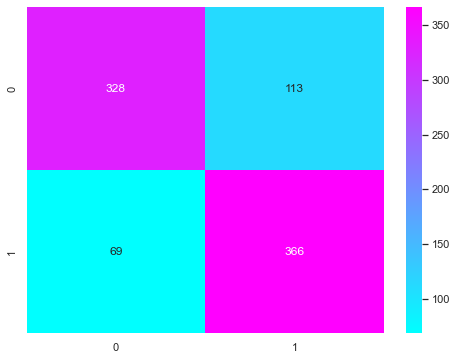

In [93]:
print_model_classification_report(xgb_model, X_test, y_test)

In [94]:
print_feature_importance(xgb_model)

CryoSleep            0.790802
HomePlanet_Earth     0.100939
HomePlanet_Europa    0.035086
VRDeck               0.014397
RoomService          0.014149
Spa                  0.012656
FoodCourt            0.011729
HomePlanet_Mars      0.010776
ShoppingMall         0.009467
dtype: float32

## Model2: XXXXXXXXXX

Accuracy:	0.8024905675131468	|	Train-Accuracy:	0.7858366647629925
F1-Score:	0.8025114155251142	|	Train-F1-Score:	0.7858332420077025

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       441
         1.0       0.80      0.80      0.80       435

    accuracy                           0.80       876
   macro avg       0.80      0.80      0.80       876
weighted avg       0.80      0.80      0.80       876



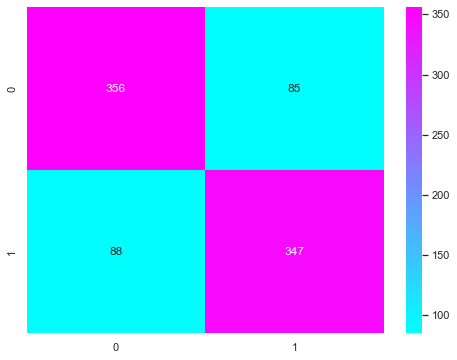

In [95]:
knn_model = KNeighborsClassifier(21) #21 -> 80,249
knn_model.fit(X_train, y_train)
print_model_classification_report(knn_model, X_test, y_test)

## RF

Accuracy:	0.812432435255349	|	Train-Accuracy:	0.9073386636207881
F1-Score:	0.8127853881278538	|	Train-F1-Score:	0.906490627135635

              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80       441
         1.0       0.78      0.86      0.82       435

    accuracy                           0.81       876
   macro avg       0.82      0.81      0.81       876
weighted avg       0.82      0.81      0.81       876



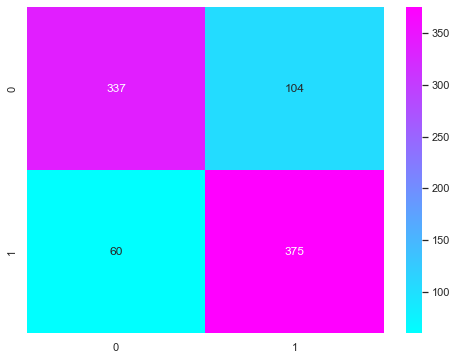

In [96]:
rf_model = RandomForestClassifier(n_estimators=320, random_state=101) # 320 -> 81.24
rf_model.fit(X_train, y_train)
print_model_classification_report(rf_model, X_test, y_test)

Accuracy:	0.8000654710590531	|	Train-Accuracy:	0.7888349514563107
F1-Score:	0.8002283105022832	|	Train-F1-Score:	0.7883391043866101

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79       441
         1.0       0.78      0.83      0.81       435

    accuracy                           0.80       876
   macro avg       0.80      0.80      0.80       876
weighted avg       0.80      0.80      0.80       876



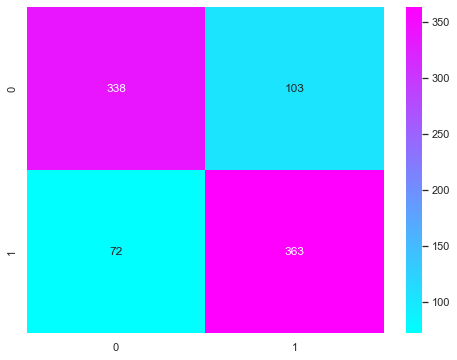

In [97]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
print_model_classification_report(svm_model, X_test, y_test)

Accuracy:	0.7628624293013182	|	Train-Accuracy:	0.9073386636207881
F1-Score:	0.7648401826484018	|	Train-F1-Score:	0.9064957513805084

              precision    recall  f1-score   support

         0.0       0.83      0.67      0.74       441
         1.0       0.72      0.86      0.78       435

    accuracy                           0.76       876
   macro avg       0.78      0.77      0.76       876
weighted avg       0.78      0.76      0.76       876



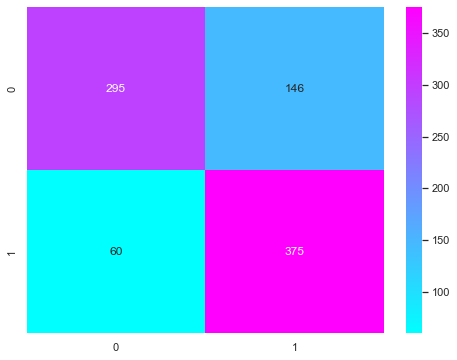

In [98]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print_model_classification_report(dt_model, X_test, y_test)

In [99]:
estimators_c1 = [
    ("rf", rf_model),
    ("knn", knn_model),
    ("xgb", xgb_model),
    ("svm", svm_model),
    ("dt", dt_model)
]

estimators_c2 = [
    ("rf", rf_model),
    ("knn", knn_model),
    ("xgb", xgb_model),
    ("svm", svm_model)
]

estimators_c3 = [
    ("rf", rf_model),
    ("knn", knn_model),
    ("svm", svm_model)
]

estimators_c4 = [
    ("rf", rf_model),
    ("knn", knn_model),
    ("xgb", xgb_model)
]

estimators_c5 = [
    ("rf", rf_model),
    ("knn", knn_model)
]

In [105]:
vc_model1 = VotingClassifier(estimators=estimators_c1, voting="soft")
vc_model2 = VotingClassifier(estimators=estimators_c2, voting="soft")
vc_model3 = VotingClassifier(estimators=estimators_c3, voting="soft")
vc_model4 = VotingClassifier(estimators=estimators_c4, voting="soft")
vc_model5 = VotingClassifier(estimators=estimators_c5, voting="soft")

vc_model1.fit(X_train, y_train)
vc_model2.fit(X_train, y_train)
vc_model3.fit(X_train, y_train)
vc_model4.fit(X_train, y_train)
vc_model5.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=320,
                                                     random_state=101)),
                             ('knn', KNeighborsClassifier(n_neighbors=21))],
                 voting='soft')

Accuracy:	0.8025090992966859	|	Train-Accuracy:	0.8823529411764706
F1-Score:	0.8025114155251142	|	Train-F1-Score:	0.8822214775701687

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       441
         1.0       0.80      0.81      0.80       435

    accuracy                           0.80       876
   macro avg       0.80      0.80      0.80       876
weighted avg       0.80      0.80      0.80       876

Accuracy:	0.8082101806239737	|	Train-Accuracy:	0.8395202741290692
F1-Score:	0.8082191780821918	|	Train-F1-Score:	0.8394777483115844

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       441
         1.0       0.81      0.81      0.81       435

    accuracy                           0.81       876
   macro avg       0.81      0.81      0.81       876
weighted avg       0.81      0.81      0.81       876

Accuracy:	0.8093545196396434	|	Train-Accuracy:	0.8306681896059395
F1-Score:	0.80

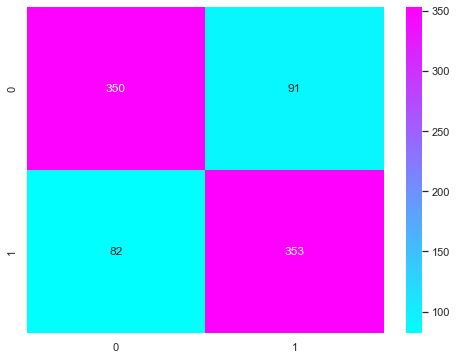

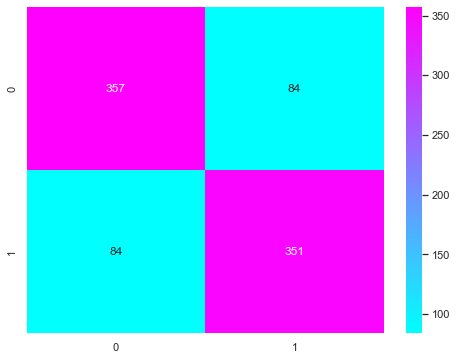

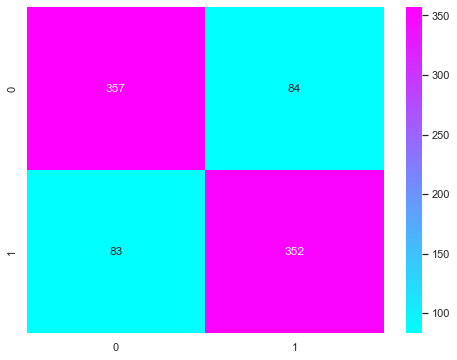

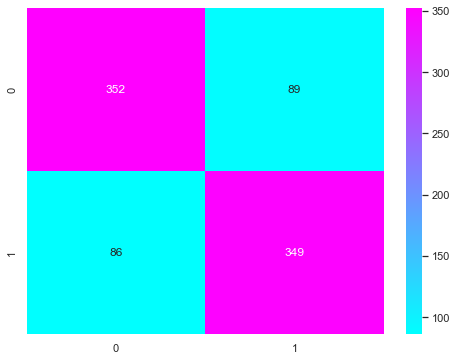

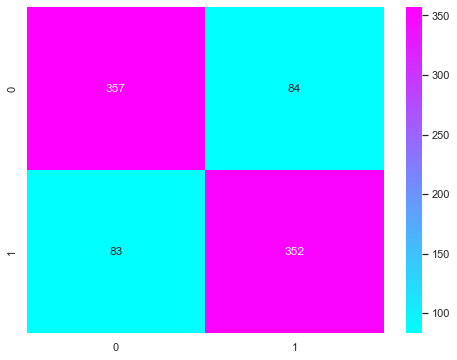

In [106]:
print_model_classification_report(vc_model1, X_test, y_test)
print_model_classification_report(vc_model2, X_test, y_test)
print_model_classification_report(vc_model3, X_test, y_test)
print_model_classification_report(vc_model4, X_test, y_test)
print_model_classification_report(vc_model5, X_test, y_test)

80.93%

# Final Model Selection

# Export the Model